<a href="https://colab.research.google.com/github/GUNWOOOH/news_classification/blob/main/TF_IDF_naivebase_news_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

논문: TF-IDF와 Naïve Bayes 분류기를 활용한 문서 분류 기법

코드 출처: https://github.com/AndersonJo/text-classification-tutorial/blob/master/spam-filtering-with-naive-bayes.ipynb

In [9]:
#from google.colab import drive
#drive.mount('/content/qdrive')

#텍스트 분류

import os
import pandas as pd
import numpy as np

#path = "/content/qdrive/MyDrive/논문데이터"
#file_list = os.listdir(path)

path = 'https://raw.githubusercontent.com/GUNWOOOH/news_classification/main/data'

#file_list2 = []
#for i in file_list:
#    file_list2.append(int(str(i).split('.')[0]))

file_list2 = ['20190507','20190508','20190509','20190510','20190511','20190512','20190513',
              '20190514','20190515','20190516','20190517','20190518','20190519','20190520','20190521',
              '20190522','20190523','20190524','20190525','20190526','20190527','20190528','20190529','20190530','20190531']

df = pd.DataFrame({'날짜' : [],'신문사' : [],'제목' : [],'내용' : [],'분야' : []})

for file in file_list2:
    df_sam = pd.read_csv(path+ '/'+ str(file) +".csv", encoding='UTF8')
    df = pd.concat([df,df_sam])


import re

title = []

for i in df.제목:
    string = re.sub(r'[^ A-Za-z가-힣+]', ' ', i)
    title.append(' '.join(string.split()))

df['신문사']  = np.where(df['신문사'] == 'TV조선', '조선일보', df['신문사'])
#특정신문사 일 때 1로 만들어주기
col_df = pd.DataFrame({'신문사': df.신문사, '제목2' : title, 'Y':(df['신문사'] == '조선일보')*1})
col_df['Y'] = col_df['Y'].astype('category')
col_df.shape

(42377, 3)

# NaiveBayes Classifier

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['title']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


              precision    recall  f1-score   support

           0       0.83      1.00      0.91      6415
           1       0.97      0.36      0.53      2061

    accuracy                           0.84      8476
   macro avg       0.90      0.68      0.72      8476
weighted avg       0.86      0.84      0.81      8476



<Axes: >

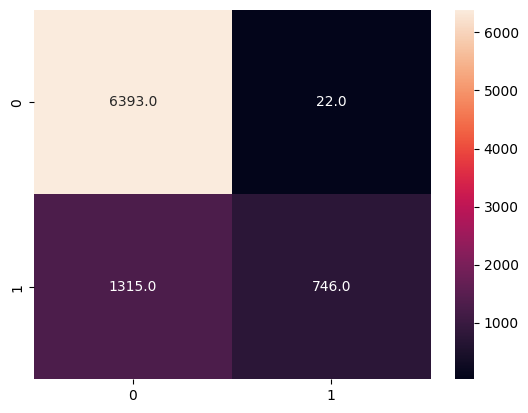

In [10]:
%pylab inline
import numpy as np 
import pandas as pd
import seaborn as sns
import string

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

pipeline = Pipeline([
    ('vectorization', CountVectorizer()),  # Convert strings to frequency vectors
    ('tfidf', TfidfTransformer()),  # Convert vectors to weighted TF-IDF scores
    ('classifier', MultinomialNB())
])

train_x, test_x, train_y, test_y = train_test_split(col_df['제목2'], col_df['Y'], test_size=0.2)
pipeline.fit(train_x, train_y)

pred_y = pipeline.predict(test_x)
print(classification_report(test_y, pred_y))
sns.heatmap(confusion_matrix(test_y, pred_y), fmt='.1f', annot=True)

# Logistict Classifier

              precision    recall  f1-score   support

           0       0.81      1.00      0.90      6475
           1       0.95      0.27      0.42      2001

    accuracy                           0.82      8476
   macro avg       0.88      0.63      0.66      8476
weighted avg       0.85      0.82      0.78      8476



<Axes: >

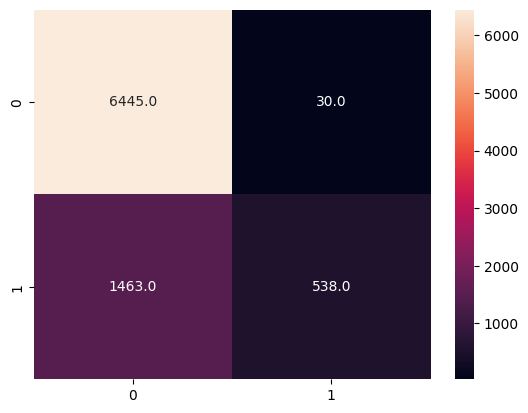

In [11]:
pipeline = Pipeline([
    ('vectorization', CountVectorizer()),  # Convert strings to frequency vectors
    ('tfidf', TfidfTransformer()),  # Convert vectors to weighted TF-IDF scores
    ('classifier', LogisticRegression())
])

train_x, test_x, train_y, test_y = train_test_split(col_df['제목2'], col_df['Y'], test_size=0.2)
pipeline.fit(train_x, train_y)

pred_y = pipeline.predict(test_x)

print(classification_report(test_y, pred_y))
sns.heatmap(confusion_matrix(test_y, pred_y), fmt='.1f', annot=True)

# SVM Classifier


              precision    recall  f1-score   support

           0       0.79      1.00      0.88      6473
           1       0.98      0.15      0.26      2003

    accuracy                           0.80      8476
   macro avg       0.88      0.57      0.57      8476
weighted avg       0.84      0.80      0.73      8476



<Axes: >

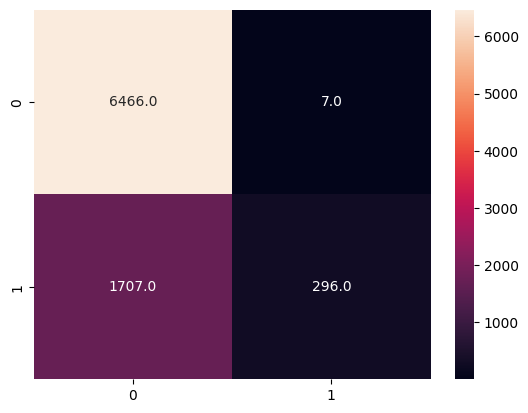

In [16]:
from sklearn.linear_model import SGDClassifier
pipeline = Pipeline([
    ('vectorization', CountVectorizer()),  # Convert strings to frequency vectors
    ('tfidf', TfidfTransformer()),  # Convert vectors to weighted TF-IDF scores
    ('classifier', SGDClassifier(loss='hinge', penalty='l2'))
])

train_x, test_x, train_y, test_y = train_test_split(col_df['제목2'], col_df['Y'], test_size=0.2)
pipeline.fit(train_x, train_y)

pred_y = pipeline.predict(test_x)

print(classification_report(test_y, pred_y))
sns.heatmap(confusion_matrix(test_y, pred_y), fmt='.1f', annot=True)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      6500
           1       0.95      0.89      0.92      1976

    accuracy                           0.96      8476
   macro avg       0.96      0.94      0.95      8476
weighted avg       0.96      0.96      0.96      8476



<Axes: >

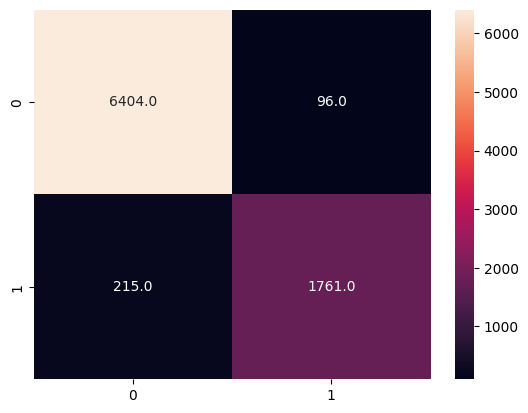

In [21]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('vectorization', CountVectorizer()),  # Convert strings to frequency vectors
    ('tfidf', TfidfTransformer()),  # Convert vectors to weighted TF-IDF scores
    ('classifier', RandomForestClassifier())
])

train_x, test_x, train_y, test_y = train_test_split(col_df['제목2'], col_df['Y'], test_size=0.2)
pipeline.fit(train_x, train_y)

pred_y = pipeline.predict(test_x)

print(classification_report(test_y, pred_y))
sns.heatmap(confusion_matrix(test_y, pred_y), fmt='.1f', annot=True)